# Workflow
## Loading the data
## Cleaning the data
## Visualizing data and becoming one with the data
## Feature engierring
## Preproccessing the data
## Modelling
## Submissions
## Repeat

In [1]:
!nvidia-smi

Fri Apr 23 23:20:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3060    Off  | 00000000:26:00.0  On |                  N/A |
|  0%   50C    P8    10W / 170W |    482MiB / 12050MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from helper.data_prep.data_cleaning import Data_Cleaning
# from helper.data_prep.preprossessing import Preprocessing

In [3]:
import os
os.listdir('./data/raw/')

['data.zip', 'test.csv', 'train.csv', 'gender_submission.csv']

## Loading the data

In [4]:
data = pd.read_csv('./data/raw/train.csv')
test_data = pd.read_csv('./data/raw/test.csv')
test_sub = pd.read_csv('./data/raw/gender_submission.csv')
data = data.sample(frac=1)

In [5]:
# dc = Data_Cleaning()
# p = Preprocessing()

## Cleanning the data

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Embarked']

150    S
327    S
800    S
662    S
371    S
      ..
548    S
634    S
603    S
741    S
720    S
Name: Embarked, Length: 891, dtype: object

In [8]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent') # or constant
si.fit(np.array(data['Embarked']).reshape(-1,1))

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [10]:
new_data = data.copy()

In [11]:
new_data['Embarked'] = si.transform(np.array(data['Embarked']).reshape(-1,1))

In [12]:
new_data['Embarked']

150    S
327    S
800    S
662    S
371    S
      ..
548    S
634    S
603    S
741    S
720    S
Name: Embarked, Length: 891, dtype: object

In [13]:
new_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
new_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
new_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
data['Cabin']

150    NaN
327      D
800    NaN
662    E58
371    NaN
      ... 
548    NaN
634    NaN
603    NaN
741    C46
720    NaN
Name: Cabin, Length: 891, dtype: object

In [17]:
new_data.drop('Cabin',axis=1,inplace=True)

In [18]:
new_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean') # or median
si.fit(np.array(data['Age']).reshape(-1,1))

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [20]:
data['Age'].shape

(891,)

<AxesSubplot:ylabel='Frequency'>

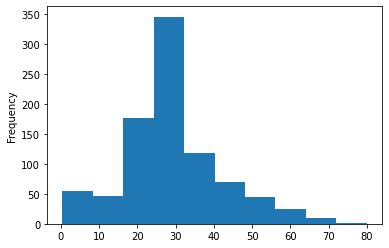

In [21]:
pd.Series(np.array(si.transform(np.array(data['Age']).reshape(-1,1))).reshape((891,))).plot.hist()

In [22]:
new_data['Age'] = np.array(si.transform(np.array(data['Age']).reshape(-1,1))).reshape((891,))

## Visualizing the data

In [23]:
os.listdir('./data/cleaned')

['cleaned_train.csv']

In [24]:
new_data.to_csv('./data/cleaned/cleaned_train.csv')

In [25]:
data = new_data

In [26]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

<AxesSubplot:ylabel='Frequency'>

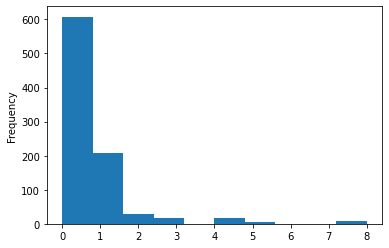

In [27]:
data['SibSp'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

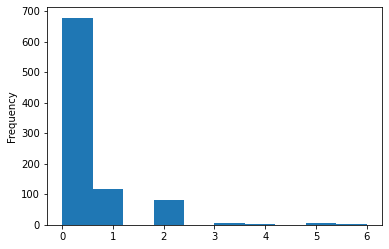

In [28]:
data['Parch'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

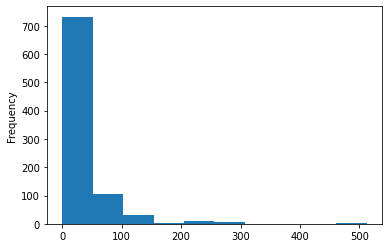

In [29]:
data['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

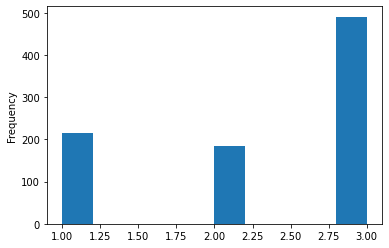

In [30]:
data['Pclass'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

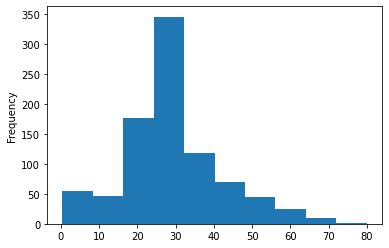

In [31]:
data['Age'].plot.hist()

In [32]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

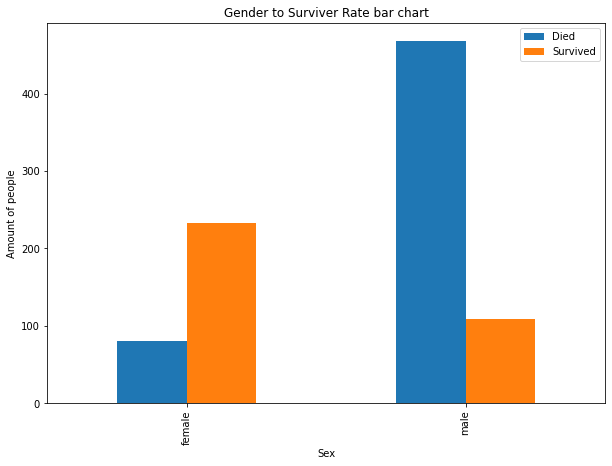

In [33]:
pd.crosstab(data['Sex'],data['Survived']).plot.bar(figsize=(10,7))
plt.legend(('Died','Survived'))
plt.ylabel('Amount of people')
plt.title('Gender to Surviver Rate bar chart')
plt.show();

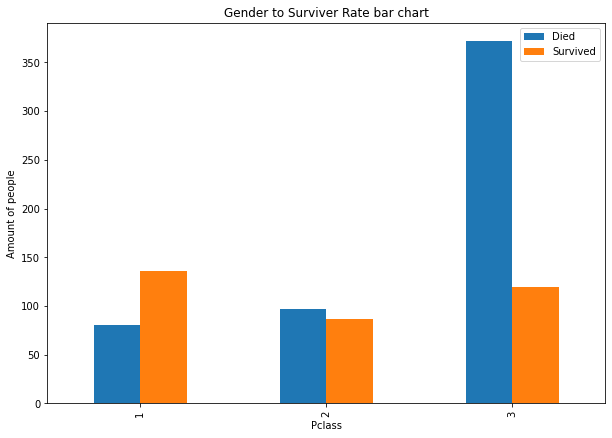

In [34]:
pd.crosstab(data['Pclass'],data['Survived']).plot.bar(figsize=(10,7))
plt.legend(('Died','Survived'))
plt.ylabel('Amount of people')
plt.title('Gender to Surviver Rate bar chart')
plt.show();

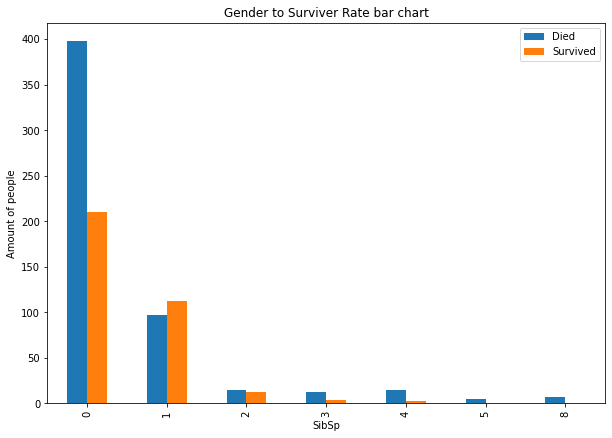

In [35]:
pd.crosstab(data['SibSp'],data['Survived']).plot.bar(figsize=(10,7))
plt.legend(('Died','Survived'))
plt.ylabel('Amount of people')
plt.title('Gender to Surviver Rate bar chart')
plt.show();

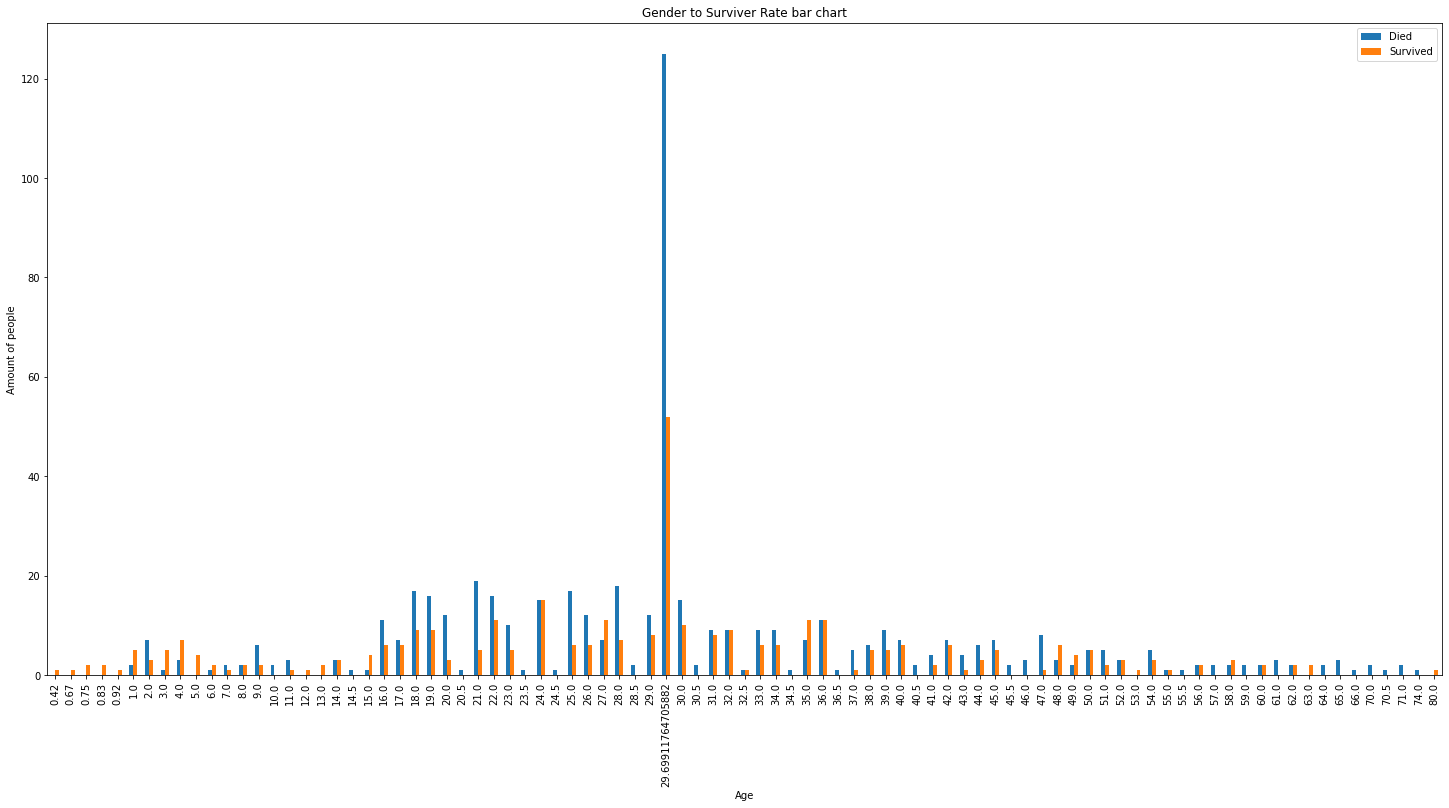

In [36]:
pd.crosstab(data['Age'],data['Survived']).plot.bar(figsize=(25,12))
plt.legend(('Died','Survived'))
plt.ylabel('Amount of people')
plt.title('Gender to Surviver Rate bar chart')
plt.show();

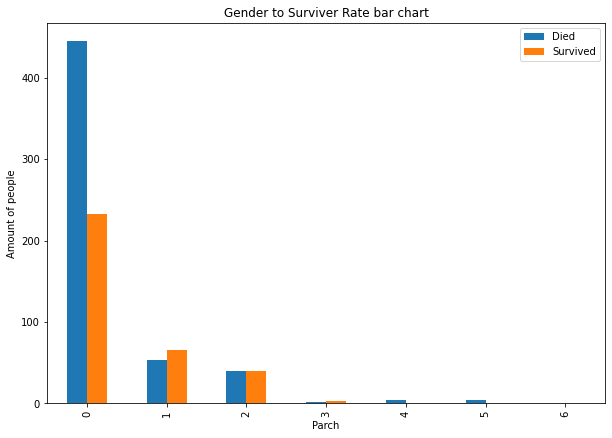

In [37]:
pd.crosstab(data['Parch'],data['Survived']).plot.bar(figsize=(10,7))
plt.legend(('Died','Survived'))
plt.ylabel('Amount of people')
plt.title('Gender to Surviver Rate bar chart')
plt.show();

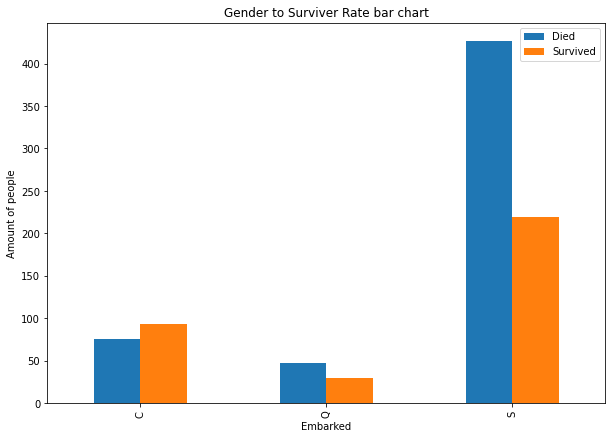

In [38]:
pd.crosstab(data['Embarked'],data['Survived']).plot.bar(figsize=(10,7))
plt.legend(('Died','Survived'))
plt.ylabel('Amount of people')
plt.title('Gender to Surviver Rate bar chart')
plt.show();

## feature enginnering

In [39]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [40]:
new_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
new_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
new_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [43]:
age_max = new_data['Age'].quantile(0.95)
age_min = new_data['Age'].quantile(0.05)

In [44]:
age_max

54.0

In [45]:
age_min

6.0

In [46]:
# data[data['Age']>age_min data['Age']<age_max]
new_data = new_data[new_data['Age']>age_min]

In [47]:
new_data = new_data[new_data['Age']<age_max]

In [48]:
len(new_data)

794

In [49]:
new_data = new_data[new_data['Age']<new_data.Age.mean() + 3*new_data.Age.std()]

In [50]:
len(new_data)

794

In [51]:
new_data = new_data[new_data['Age']>new_data.Age.mean() + -3*new_data.Age.std()]

In [52]:
len(new_data)

794

In [53]:
def feature_enginner_data(data,column):
    print(column)
    print(len(data))
    data = data[data[column]>data[column].quantile(0.05)]
    data = data[data[column]<data[column].quantile(0.95)]
    data = data[data[column]>data[column].mean() + -3*data[column].std()]
    data = data[data[column]<data[column].mean() + 3*data[column].std()]
    print(len(data))
    return data

In [54]:
new_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [55]:
new_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [56]:
cols = ['PassengerId','SibSp','Parch','Fare']
for col in cols:
    feature_enginner_data(new_data,col)

PassengerId
794
716
SibSp
794
206
Parch
794
148
Fare
794
704


In [57]:
data = new_data


In [58]:
new_data['Fare']= feature_enginner_data(new_data,'Fare')

Fare
794
704


## Preproccessing

In [59]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,OneHotEncoder,LabelEncoder,Normalizer

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
from sklearn.compose import make_column_transformer

In [62]:
new_data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare           90
Embarked        0
dtype: int64

In [63]:
new_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Embarked        object
dtype: object

In [64]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent') # or constant
si.fit(np.array(new_data['Fare']).reshape(-1,1))
new_data['Fare'] = si.transform(np.array(new_data['Fare']).reshape(-1,1))

In [65]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Embarked        object
dtype: object

In [66]:
new_data['Fare'] = new_data['Fare'].astype(int)

In [67]:
new_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int64
Embarked        object
dtype: object

In [68]:
sex_Convertor = {'female':0,'male':1}
new_s_col = []
for info in new_data['Sex']:
    new_s_col.append(sex_Convertor[info])
new_data['Sex'] = new_s_col

In [69]:
cols_ohe = ['Name','Sex']

In [70]:
list(new_data.drop('Survived',axis=1).columns)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [71]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,OneHotEncoder,LabelEncoder,Normalizer

In [72]:
label_encoder = False

In [73]:
new_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int64
Embarked        object
dtype: object

In [74]:
new_data.drop('Embarked',axis=1,inplace=True)

In [75]:
onehot_encoding_cols = ['Name','Ticket']
other_cols = ['PassengerId','Pclass','SibSp','Age','Parch','Fare','Sex']

In [76]:
label_encoder = True

In [77]:
pres = [StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),OneHotEncoder(),Normalizer()]
for pre in pres:
    print(pre)
    nos = make_column_transformer(
        (OneHotEncoder(),onehot_encoding_cols),
        (pre,other_cols)
    )
    nos.fit(new_data.drop('Survived',axis=1))
    X = nos.transform(new_data.drop('Survived',axis=1))
    if label_encoder is True:
        le = LabelEncoder()
        le.fit(new_data['Survived'])
        y = le.transform(new_data['Survived'])
    y = new_data['Survived']
    model = GradientBoostingClassifier()
    model.fit(X,y)
    print(model.score(X,y))

StandardScaler(copy=True, with_mean=True, with_std=True)
0.8564231738035264
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)
/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)
0.8564231738035264
MinMaxScaler(copy=True, feature_range=(0, 1))
0.8576826196473551
MaxAbsScaler(copy=True)
/home/indika/anaconda3/lib/python3.7/site-

In [78]:
## Normalizer wins
# 0.8664987405541562

## Modelling

In [79]:
onehot_encoding_cols = ['Name','Ticket']
other_cols = ['PassengerId','Pclass','SibSp','Age','Parch','Fare','Sex']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = new_data.drop('Survived',axis=1)
y = new_data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [82]:
test_sizes = [0.20,0.125,0.25,0.15,0.175]
for test_size in test_sizes:
    print(test_size)
    X = new_data.drop('Survived',axis=1)
    y = new_data['Survived']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
    ct = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'),onehot_encoding_cols),
        (Normalizer(),other_cols)
    )
    ct.fit(X_train)
    X_train = ct.transform(X_train)
    X_train = X_train.toarray()
    X_test = ct.transform(X_test)
    X_test = X_test.toarray()
    le = LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
    y_test = le.transform(y_test)
    model = GradientBoostingClassifier()
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test))
    print('\n')

0.2
0.8113207547169812


0.125
0.8


0.25
0.7537688442211056


0.15
0.8333333333333334


0.175
0.762589928057554




In [83]:
## best normalization params
pres = [Normalizer(norm='l1',copy=False),Normalizer(norm='l2',copy=False),Normalizer(norm='max',copy=False),Normalizer(norm='l1',copy=True),Normalizer(norm='l2',copy=True),Normalizer(norm='max',copy=True)]
for pre in pres:
    print('*'*50)
    print(pre)
    nos = make_column_transformer(
        (OneHotEncoder(),onehot_encoding_cols),
        (pre,other_cols)
    )
    nos.fit(new_data.drop('Survived',axis=1))
    X = nos.transform(new_data.drop('Survived',axis=1))
    if label_encoder is True:
        le = LabelEncoder()
        le.fit(new_data['Survived'])
        y = le.transform(new_data['Survived'])
    y = new_data['Survived']
    model = GradientBoostingClassifier()
    model.fit(X,y)
    print(model.score(X,y))
    print('*'*50)

**************************************************
Normalizer(copy=False, norm='l1')
0.8551637279596978
**************************************************
**************************************************
Normalizer(copy=False, norm='l2')
0.8677581863979849
**************************************************
**************************************************
Normalizer(copy=False, norm='max')
0.8564231738035264
**************************************************
**************************************************
Normalizer(copy=True, norm='l1')
0.8576826196473551
**************************************************
**************************************************
Normalizer(copy=True, norm='l2')
0.8602015113350125
**************************************************
**************************************************
Normalizer(copy=True, norm='max')
0.8576826196473551
**************************************************


In [84]:
## best normalizer params = copy=False, norm='l2'

In [85]:
X = new_data.drop('Survived',axis=1)
y = new_data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.175)
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),onehot_encoding_cols),
    (Normalizer(copy=False, norm='l2'),other_cols)
)
ct.fit(X_train)
X_train = ct.transform(X_train)
X_train = X_train.toarray()
X_test = ct.transform(X_test)
X_test = X_test.toarray()
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier,RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier,CatBoost

In [87]:
models = [
    ['KNeighborsClassifier',KNeighborsClassifier],
    ['LogisticRegression',LogisticRegression],
    ['LogisticRegressionCV',LogisticRegressionCV],
    ['RidgeClassifier',RidgeClassifier],
    ['RidgeClassifierCV',RidgeClassifierCV],
    ['GaussianNB',GaussianNB],
    ['DecisionTreeClassifier',DecisionTreeClassifier],
    ['GradientBoostingClassifier',GradientBoostingClassifier],
    ['AdaBoostClassifier',AdaBoostClassifier],
    ['RandomForestClassifier',RandomForestClassifier],
    ['BaggingClassifier',BaggingClassifier],
    ['SVC',SVC],
    ['XGBClassifier',XGBClassifier],
    ['XGBRFClassifier',XGBRFClassifier],
    ['CatBoostClassifier',CatBoostClassifier],
]

In [88]:
results = {}

In [89]:
# vclf_soft = VotingClassifier(estimators=[('KNeighborsClassifier',KNeighborsClassifier),
#     ('LogisticRegression',LogisticRegression()),
#     ('LogisticRegressionCV',LogisticRegressionCV()),
#     ('RidgeClassifier',RidgeClassifier()),
#     ('RidgeClassifierCV',RidgeClassifierCV()),
#     ('GaussianNB',GaussianNB()),
#     ('DecisionTreeClassifier',DecisionTreeClassifier()),
#     ('AdaBoostClassifier',AdaBoostClassifier()),
#     ('RandomForestClassifier',RandomForestClassifier()),
#     ('BaggingClassifier',BaggingClassifier()),
#     ('SVC',SVC())
#     ],voting='soft')
# vclf_soft.fit(X_train,y_train)
# vclf_soft.score(X_test,y_test)

In [90]:
from sklearn.metrics import *

In [91]:
# for model in models:
#     print('*'*50)
#     print(model_name)
#     model_name = model[0]
#     model = model[1]()
#     model.fit(X=X_train,y=y_train)
#     preds = model.predict(X_test)
#     results[model_name] = accuracy_score(y_test,preds)
#     print('*'*50)

In [92]:
results

{}

In [93]:
xgbrfc = XGBRFClassifier()
xgbc = XGBClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
adc = AdaBoostClassifier()

In [94]:
vc_soft= VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='soft')
vc_soft.fit(X_train,y_train)

/home/indika/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:21:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgbrfc', XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
        colsample_bynode=0.8, colsample_bytree=None, gamma=None,
        gpu_id=None, importance_type='gain', interaction_constraints=None,
        learning_rate=1, max_delta_step=None, max_depth=None,
    ...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [95]:
vc_soft.score(X_test,y_test)

0.7482014388489209

In [96]:
vc_hard= VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='hard')
vc_hard.fit(X_train,y_train)

/home/indika/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:21:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgbrfc', XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
        colsample_bynode=0.8, colsample_bytree=None, gamma=None,
        gpu_id=None, importance_type='gain', interaction_constraints=None,
        learning_rate=1, max_delta_step=None, max_depth=None,
    ...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [97]:
vc_hard.score(X_test,y_test)

0.762589928057554

### VotingClassifier won !!

In [98]:
# vc_soft= VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='soft')
# vc_soft.fit(X_train,y_train)

In [99]:
models = [
    ['VC,Voting=soft',VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='soft')],
    ['VC,Voting=hard',VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='hard')],
    ['VC,flatten_transform=False',VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],flatten_transform=False)],
    ['VC,flatten_transform=True',VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],flatten_transform=True)],
    ['VC,flatten_transform=TrueVoting=Soft',VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],flatten_transform=True,voting='soft')],
    ['VC,flatten_transform=FalseVoting=Soft',VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],flatten_transform=False,voting='soft')],
]

In [100]:
results = {}

In [101]:
for model in models:
    print('*'*50)
    model_name = model[0]
    print(model_name)
    model = model[1]
    model.fit(X=X_train,y=y_train)
    preds = model.predict(X_test)
    results[model_name] = accuracy_score(y_test,preds)
    print('*'*50)

**************************************************
VC,Voting=soft
/home/indika/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:21:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

In [102]:
results

{'VC,Voting=soft': 0.7482014388489209,
 'VC,Voting=hard': 0.762589928057554,
 'VC,flatten_transform=False': 0.7482014388489209,
 'VC,flatten_transform=True': 0.762589928057554,
 'VC,flatten_transform=TrueVoting=Soft': 0.7482014388489209,
 'VC,flatten_transform=FalseVoting=Soft': 0.7482014388489209}

In [103]:
# vc_soft= VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='soft')
# vc_soft.fit(X_train,y_train)
# the above model won but the models inside the Voting classifier are not param grid trained so I am going to train all of the models 

In [111]:
xgbrfc = XGBRFClassifier(tree_method='gpu_hist', gpu_id=0)
xgbc = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
gbc = GradientBoostingClassifier()
adc = AdaBoostClassifier()

In [112]:
# param_gbc = {
#     'loss':['deviance','exponential'],
#     'learning_rate':[0.1,1.0,0.01,0.001],
#     'n_estimators':[100,1000,2500],
#     'max_depth':[2,3,5,7],
#     'max_features':['auto','sqrt','log2'],
#     'warm_start':[False,True]
# }
# param_adc = {
#     'n_estimators':[25,50,100,1000,1250,2500],
#     'learning_rate':[1,0.1,0.01,0.001,0.0001],
#     'algorithm':['SAMME','SAMME.R']
# }

In [113]:
from sklearn.model_selection import *
from sklearn.metrics import *

In [114]:
# 0.8345323741007195
adc_clf = GridSearchCV(estimator=adc,
                            param_grid=param_adc,
                            cv=5,
                            verbose=2)
# adc_clf.fit(X_train,y_train)
# ada_score = adc_clf.score(X_test,y_test)
# print(ada_score)

NameError: name 'param_adc' is not defined

In [115]:
# 0.8345323741007195
gbc_clf = GridSearchCV(estimator=gbc,
                            param_grid=param_gbc,
                            cv=5,
                            verbose=2)
# gbc_clf.fit(X_train,y_train)
# gbc_score = gbc_clf.score(X_test,y_test)
# print(gbc_score)

NameError: name 'param_gbc' is not defined

In [116]:
vc_soft= VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='soft')
vc_soft.fit(X_train,y_train)
print(vc_soft.score(X_test,y_test))

/home/indika/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:23:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7482014388489209


In [117]:
vc_hard= VotingClassifier(estimators=[('xgbrfc',xgbrfc),('xgbc',xgbc),('gbc',gbc),('adc',adc)],voting='hard')
vc_hard.fit(X_train,y_train)
print(vc_hard.score(X_test,y_test))

/home/indika/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:23:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7482014388489209


## Voting Classifier voting = 'soft' won !!

## Saving the model

In [118]:
import pickle

In [119]:
!pip3 install joblib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [120]:
import joblib
joblib.dump(vc_soft,'./models/vc_soft-0.obj')

['./models/vc_soft-0.obj']

In [121]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
vc_soft.score(X_test,y_test)

0.7482014388489209

In [123]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
150,151,0,2,"Bateman, Rev. Robert James",1,51.0,0,0,S.O.P. 1166,151
327,328,1,2,"Ball, Mrs. (Ada E Hall)",0,36.0,0,0,28551,328
800,801,0,2,"Ponesell, Mr. Martin",1,34.0,0,0,250647,801
662,663,0,1,"Colley, Mr. Edward Pomeroy",1,47.0,0,0,5727,663
371,372,0,3,"Wiklund, Mr. Jakob Alfred",1,18.0,1,0,3101267,1
...,...,...,...,...,...,...,...,...,...,...
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",0,24.0,1,0,244367,317
548,549,0,3,"Goldsmith, Mr. Frank John",1,33.0,1,1,363291,549
634,635,0,3,"Skoog, Miss. Mabel",0,9.0,3,2,347088,635
603,604,0,3,"Torber, Mr. Ernst William",1,44.0,0,0,364511,604


In [124]:
test_data.drop(['Cabin','Embarked'],axis=1,inplace=True)

In [125]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
dtype: int64

In [126]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [127]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [128]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [129]:
new_s_col = []
for info in test_data['Sex']:
    new_s_col.append(sex_Convertor[info])
test_data['Sex'] = new_s_col

In [130]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [131]:
test_data_t = ct.transform(test_data).toarray()

In [137]:
preds= vc_soft.predict(test_data_t)

In [138]:
ids = test_data['PassengerId']

In [139]:
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':preds})

In [140]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [141]:
submission.to_csv('./submissions/submission-7.csv',index=False)